In [129]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Linear Regression Algorithm

In [130]:
train_x = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])

In [131]:
learning_rate = 0.01
epochs = 2000
display_steps = 50
n_sample = train_x.shape[0]

In [132]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

In [133]:
pred = tf.add(tf.multiply(X, W), b)

In [134]:
cost = tf.reduce_sum(tf.pow(pred-Y, 2)) / (2*n_sample)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [135]:
init = tf.global_variables_initializer()

 Epoch:  50  Cost:  0.11483388  W:  0.358465  b:  0.018253727
 Epoch:  100  Cost:  0.11045725  W:  0.35198984  b:  0.064835116
 Epoch:  150  Cost:  0.10658624  W:  0.3458998  b:  0.108646214
 Epoch:  200  Cost:  0.10316249  W:  0.340172  b:  0.14985164
 Epoch:  250  Cost:  0.1001344  W:  0.33478492  b:  0.18860629
 Epoch:  300  Cost:  0.09745624  W:  0.32971823  b:  0.22505592
 Epoch:  350  Cost:  0.09508755  W:  0.3249528  b:  0.25933778
 Epoch:  400  Cost:  0.09299269  W:  0.32047084  b:  0.29158077
 Epoch:  450  Cost:  0.09113997  W:  0.3162554  b:  0.3219062
 Epoch:  500  Cost:  0.0895014  W:  0.3122908  b:  0.35042775
 Epoch:  550  Cost:  0.08805226  W:  0.30856174  b:  0.37725362
 Epoch:  600  Cost:  0.0867707  W:  0.3050545  b:  0.4024842
 Epoch:  650  Cost:  0.085637346  W:  0.3017561  b:  0.42621323
 Epoch:  700  Cost:  0.08463507  W:  0.29865378  b:  0.4485314
 Epoch:  750  Cost:  0.08374872  W:  0.29573575  b:  0.46952245
 Epoch:  800  Cost:  0.082964905  W:  0.2929915  b:  

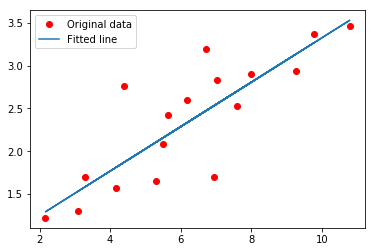

In [136]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(epochs):
        for (x,y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
            
        if (epoch + 1) % display_steps == 0:
            c = sess.run(cost, feed_dict={X:train_x, Y:train_y})
            print(" Epoch: ", epoch+1, " Cost: ", c," W: ", sess.run(W), " b: ", sess.run(b))
    print("Optimization Finished!")
    
    training_cost = sess.run(cost, feed_dict={X:train_x, Y:train_y})
    print(" Training Cost: ",training_cost, " W: ", sess.run(W), " b: ", sess.run(b))
    
    plt.plot(train_x, train_y, 'ro', label='Original data')
    plt.plot(train_x, sess.run(W)*train_x + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()
    

## Linear Regression Example

In [183]:
data = np.random.rand(200,3)*100

In [185]:
data

array([[3.44596469e+01, 3.17681457e+01, 6.92017862e+01],
       [8.67590890e+01, 7.50887324e+01, 6.78781131e+01],
       [6.94052524e+00, 2.37434071e+01, 3.38107046e+01],
       [3.32872226e+01, 9.33841062e+01, 3.19873633e+01],
       [7.75899651e+01, 4.50739095e+01, 7.28826209e+01],
       [6.42514271e+01, 2.07497580e+01, 1.66600727e+01],
       [4.23284873e+01, 8.59155460e+01, 3.22633131e+01],
       [8.34219425e+01, 2.18247987e+01, 4.50808006e+01],
       [9.03787859e+01, 3.47148315e+01, 2.58499853e+01],
       [7.58245491e+01, 8.04413215e+01, 3.62776979e+01],
       [3.81554635e+01, 5.95350309e+01, 2.37836855e+01],
       [2.59667174e+01, 2.37533514e+01, 1.86406214e+01],
       [9.07333701e+01, 4.05349726e+01, 1.34607011e+01],
       [1.46547428e+01, 3.37323702e+01, 9.82156584e+00],
       [2.68702065e+01, 3.50851256e+01, 7.26244315e+01],
       [1.67193076e+01, 8.20009145e+01, 8.16248305e+01],
       [9.11024472e+01, 2.31856781e+01, 6.61638025e+01],
       [5.47686078e+01, 2.50400

In [186]:
def normalize(features):
#     print(features.T)
    for feature in features.T:
        fmean = np.mean(feature)
        frange = np.amax(feature) - np.amin(feature)
        feature -= fmean
        feature /= frange
    return features
    
    
normalized_data = normalize(data)    

In [187]:
normalized_data

array([[-0.13815507, -0.19118793,  0.19418279],
       [ 0.38870174,  0.24340122,  0.1809068 ],
       [-0.41537862, -0.27169156, -0.16077763],
       [-0.1499659 ,  0.42693916, -0.17906512],
       [ 0.29633335, -0.05770542,  0.2311003 ],
       [ 0.16196289, -0.30172364, -0.33279259],
       [-0.05888554,  0.35201507, -0.17629744],
       [ 0.35508382, -0.2909389 , -0.04774243],
       [ 0.42516603, -0.16162698, -0.24062092],
       [ 0.27854881,  0.29709803, -0.13603453],
       [-0.10092397,  0.08736756, -0.2613452 ],
       [-0.22371158, -0.2715918 , -0.31292837],
       [ 0.42873805, -0.10323972, -0.36488119],
       [-0.33766674, -0.17148296, -0.40138047],
       [-0.21460997, -0.15791221,  0.22851075],
       [-0.31686862,  0.31274376,  0.31878167],
       [ 0.43245608, -0.27728665,  0.16371285],
       [ 0.06643438, -0.25868386, -0.00419674],
       [-0.00887881,  0.0894231 , -0.0083393 ],
       [ 0.14591447,  0.25087974,  0.03377723],
       [ 0.14727468,  0.31885916,  0.132

In [189]:
def predict(input_data, weights):
    return np.dot(input_data, weights)
    


w1, w2, w3 = 0.0, 0.0, 0.0
weights = [[w1],[w2],[w3]]
preds = predict(normalized_data,  weights)
print(preds.shape)


(200, 1)


In [ ]:
def cost_function(input_data, target, weights):
    
    
cost_function() 